2. What makes a person charismatic ?




In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file1 = '/content/drive/MyDrive/Dating App Dataset/users_api-results.csv'
users_instances = pd.read_csv(file1)
users_instances

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,1,2015-04-07T00:08:59Z,1.428365e+09,0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3969,F,M,20,Ma**e,1.00,8,1014,43,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3970,F,M,20,Ma**e,1.00,8,1101,46,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,0,2015-04-06T15:47:15Z,1.428335e+09,0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN


In [ ]:
users_instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

In [ ]:
users_instances = users_instances.query('age not in [18, 27, 28]')

# **Charisma Score**


Charisma reflects the user's ability to attract meaningful interactions, such as kisses and fans, rather than just sheer volume of interactions like profile visits or picture count.

> Engagement Rate

*  Definition: The engagement rate measures how effectively a user's profile generates interactions (kisses, fans) relative to the number of profile visits. A higher engagement rate means that a user is able to attract more meaningful interactions per profile visit.

*   Formula: Engagement Rate = (count_kisses + count_fans)/count_profileVisits


> Picture Effectiveness

*   Definition: This metric shows how effective the pictures uploaded by a user are at generating engagement (kisses and fans). It compares the number of interactions (kisses and fans) to the number of pictures, emphasizing the quality of interactions per picture.
*   Formula: Picture Effectiveness = (count_kisses+count_fans)/count_pictures

In [ ]:
import numpy as np

def safe_divide_vectorized(numerator, denominator):
    return np.where(
        (numerator == 0) & (denominator == 0), 0,np.where(denominator == 0, 0, numerator / denominator))




*   Engagement Rate



In [ ]:
users_instances["engagement_rate"] = np.round(
    safe_divide_vectorized(
        users_instances["counts_kisses"] + users_instances["counts_fans"],
        users_instances["counts_profileVisits"]
    ),
    2
)
users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")


<ipython-input-6-3f8dd1ac646a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = np.round(
<ipython-input-6-3f8dd1ac646a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")


In [ ]:
users_instances["engagement_rate"].unique()

array(['0.03', '0.02', '0.06', '0.05', '0.04', '0.07', '0.08', '0.01',
       '0.11', '0.12', '0.00', '0.09', '0.10', '0.14', '0.30', '0.16',
       '0.15', '0.13', '0.21', '0.19', '0.33', '0.17', '0.28', '0.25',
       '0.20', '0.29', '0.23', '0.26', '0.87', '0.31', '0.61', '1.57',
       '0.32', '1.06', '0.85', '0.38', '0.50', '1.31', '0.35', '0.89',
       '0.24', '0.93', '0.44', '0.57', '2.47', '1.14', '1.80', '0.18',
       '2.00', '2.88', '11.00', '2.60'], dtype=object)



*   Picture Effectiveness




In [ ]:
users_instances["picture_effectiveness"] = np.round(
    safe_divide_vectorized(
        (users_instances["counts_kisses"] + users_instances["counts_fans"] ) ,
        users_instances["counts_pictures"]
        ),
   2)

<ipython-input-8-1b7e41b12398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["picture_effectiveness"] = np.round(


In [ ]:
users_instances["picture_effectiveness"].unique()

array([59.75,  2.6 , 22.  , ..., 72.43, 74.86, 80.43])

In [ ]:
users_instances["engagement_rate"] = pd.to_numeric(users_instances["engagement_rate"], errors="coerce")
users_instances["picture_effectiveness"] = pd.to_numeric(users_instances["picture_effectiveness"], errors="coerce")
users_instances["charisma_score"] = round(
    ((users_instances["engagement_rate"] * 0.6) + (users_instances["picture_effectiveness"] * 0.4)) / 2, 2
)

<ipython-input-10-cf425bb4f06b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = pd.to_numeric(users_instances["engagement_rate"], errors="coerce")
<ipython-input-10-cf425bb4f06b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["picture_effectiveness"] = pd.to_numeric(users_instances["picture_effectiveness"], errors="coerce")
<ipython-input-10-cf425bb4f06b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
users_instances["charisma_score"].unique()

array([11.96,  0.53,  4.42, ...,  7.25, 15.  , 16.11])

In [ ]:
users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()

<ipython-input-12-67f94983ba0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()


In [ ]:
print('Average Engagement Rate of All Users')
print(users_instances[['engagement_rate']].mean())

Average Engagement Rate of All Users
engagement_rate    0.049481
dtype: float64


In [ ]:
charismatic_users = users_instances[users_instances['is_charismatic'] == True]
non_charismatic_users = users_instances[users_instances['is_charismatic'] == False]

In [ ]:
print('Average Engagement Rate of Charismatic Users')
print(charismatic_users[['engagement_rate']].mean())

Average Engagement Rate of Charismatic Users
engagement_rate    0.062665
dtype: float64


In [ ]:
print('Average Engagement Rate of Not Charismatic Users')
print(non_charismatic_users[['engagement_rate']].mean())

Average Engagement Rate of Not Charismatic Users
engagement_rate    0.03635
dtype: float64


Average Engagement Rate by Age Among Charismatic Users

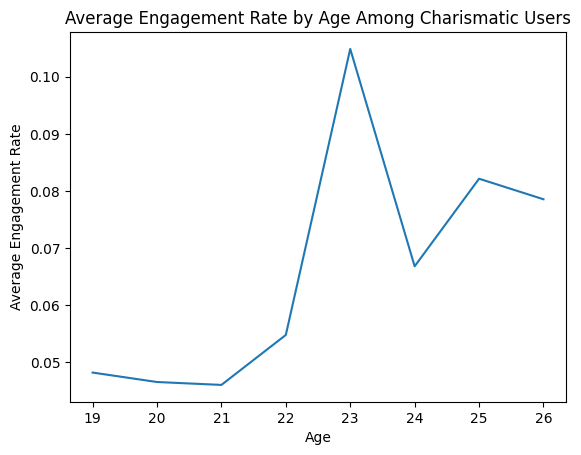

In [ ]:
age_vs_engRate = charismatic_users.groupby('age')['engagement_rate'].mean()

plt.plot(age_vs_engRate.index, age_vs_engRate.values)
plt.xlabel('Age')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Age Among Charismatic Users')
plt.show()

Average Picture Effectiveness by Age Among Charismatic Users



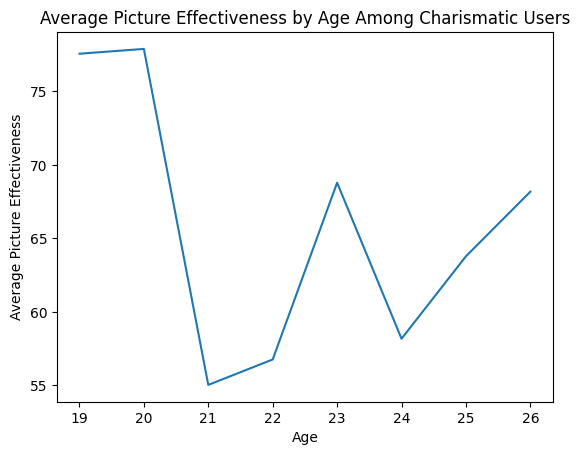

In [ ]:
age_vs_pictureEffective = charismatic_users.groupby('age')['picture_effectiveness'].mean()

plt.plot(age_vs_pictureEffective.index, age_vs_pictureEffective.values)
plt.xlabel('Age')
plt.ylabel('Average Picture Effectiveness')
plt.title('Average Picture Effectiveness by Age Among Charismatic Users')
plt.show()

Age split of Charismatic Users

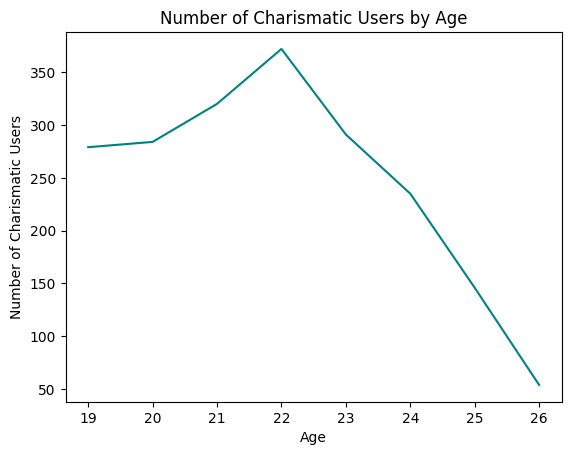

In [ ]:
charismatic_user_counts = charismatic_users.groupby('age').size()
plt.plot(charismatic_user_counts.index, charismatic_user_counts.values, color='teal')
plt.xlabel('Age')
plt.ylabel('Number of Charismatic Users')
plt.title('Number of Charismatic Users by Age')
plt.show()

Age split of Non Charismatic Users

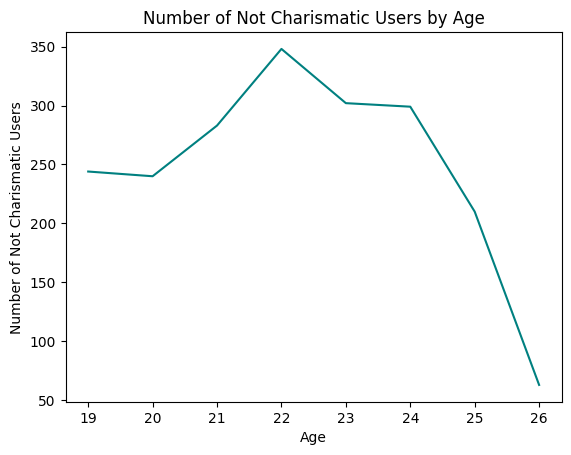

In [ ]:
not_charismatic_user_counts = non_charismatic_users.groupby('age').size()
plt.plot(not_charismatic_user_counts.index, not_charismatic_user_counts.values, color='teal')
plt.xlabel('Age')
plt.ylabel('Number of Not Charismatic Users')
plt.title('Number of Not Charismatic Users by Age')
plt.show()

Top Languages of Charismatic Users

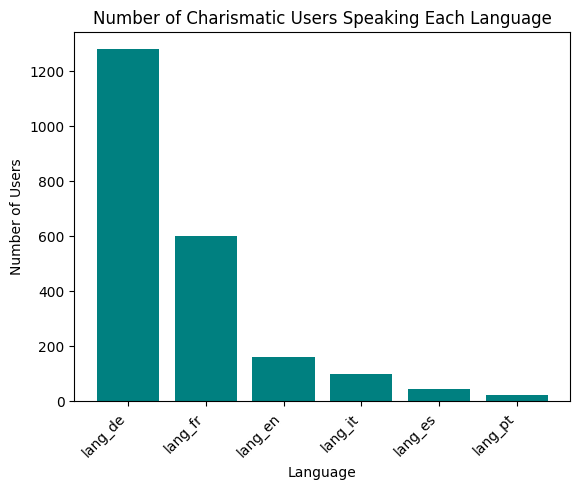

,0
lang_de,1278
lang_fr,600
lang_en,159
lang_it,99
lang_es,45
lang_pt,24


In [ ]:

language_columns = ['lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt']
language_counts = charismatic_users[language_columns].sum()
language_counts = language_counts.sort_values(ascending=False)
plt.bar(language_counts.index, language_counts.values, color='teal')

plt.xlabel('Language')
plt.ylabel('Number of Users')
plt.title('Number of Charismatic Users Speaking Each Language')

plt.xticks(rotation=45, ha='right')
plt.show()
language_counts

Top Country of Charismatic Users

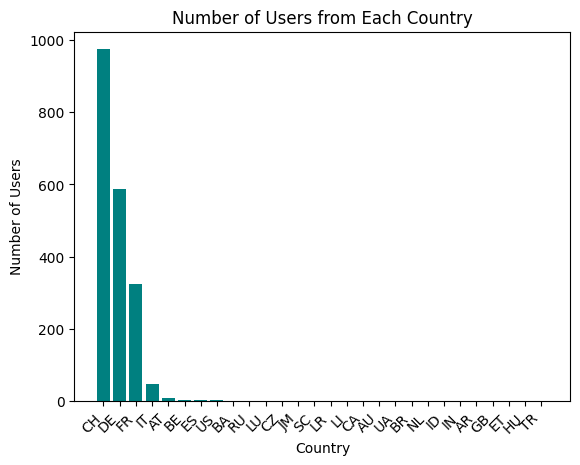

In [ ]:

country_counts = charismatic_users['country'].value_counts()
country_counts = country_counts.sort_values(ascending=False)
plt.bar(country_counts.index, country_counts.values, color='teal')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Number of Users from Each Country')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
grouped = charismatic_users.groupby(['age']).agg({
    'engagement_rate': 'mean',
    'picture_effectiveness': 'mean',
    'charisma_score': 'mean',
    'counts_fans': 'sum',
    'counts_kisses': 'sum',
    'counts_pictures': 'sum'

}).reset_index()

In [ ]:
grouped

,age,engagement_rate,picture_effectiveness,charisma_score,counts_fans,counts_kisses,counts_pictures
0,19,0.048136,77.570466,15.529068,1249,86969,1504
1,20,0.046479,77.896866,15.594014,798,103207,1595
2,21,0.045969,55.023281,11.019125,1082,93141,1852
3,22,0.054731,56.756156,11.368360,1043,89291,1788
4,23,0.104880,68.788110,13.789759,1701,88627,1383
5,24,0.066766,58.167915,11.654213,1218,61774,1173
6,25,0.082123,63.780411,12.781370,841,36948,716
7,26,0.078519,68.178704,13.660741,371,16235,264


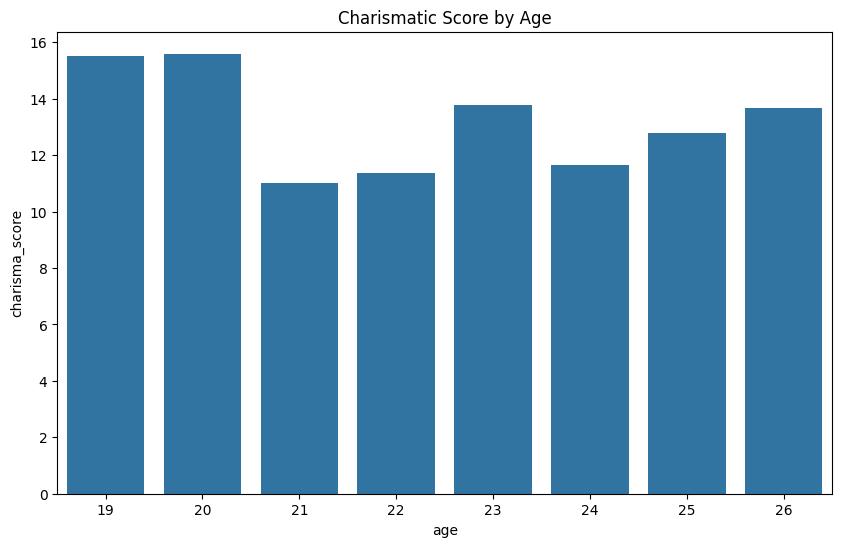

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='charisma_score', data=grouped)
plt.title('Charismatic Score by Age')
plt.show()

Correlation Between Number of Pictures and Charisma Score

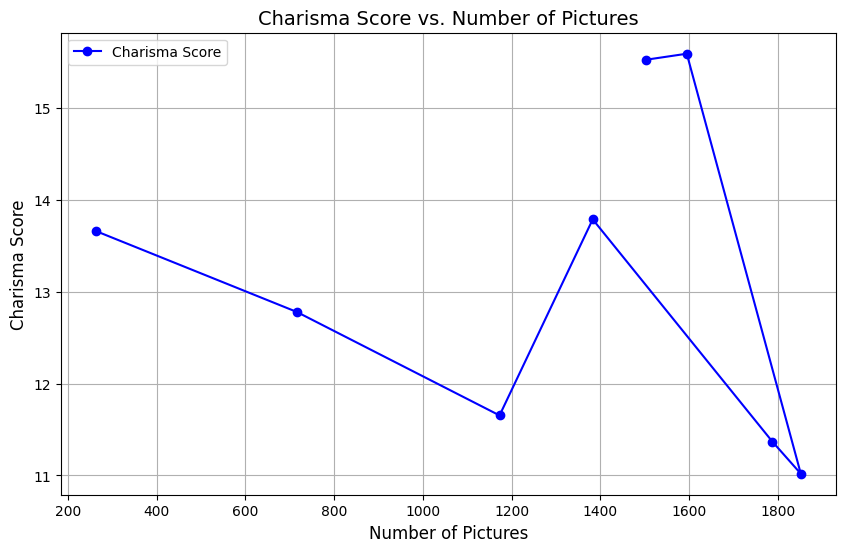

In [ ]:
import matplotlib.pyplot as plt

# Simple line plot for charisma_score vs. counts_pictures
plt.figure(figsize=(10, 6))
plt.plot(grouped['counts_pictures'], grouped['charisma_score'], marker='o', label='Charisma Score', color='blue')
plt.xlabel('Number of Pictures', fontsize=12)
plt.ylabel('Charisma Score', fontsize=12)
plt.title('Charisma Score vs. Number of Pictures', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
age_grouped = grouped.groupby('age').agg({
    'counts_fans': 'sum',
    'counts_kisses': 'sum',
    'charisma_score': 'mean'
}).reset_index()

Do younger or older users attract different types of engagement?

<ipython-input-28-d9f9a9c7751e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='counts_fans', data=age_grouped, palette='Blues')
<ipython-input-28-d9f9a9c7751e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='counts_kisses', data=age_grouped, palette='Reds')


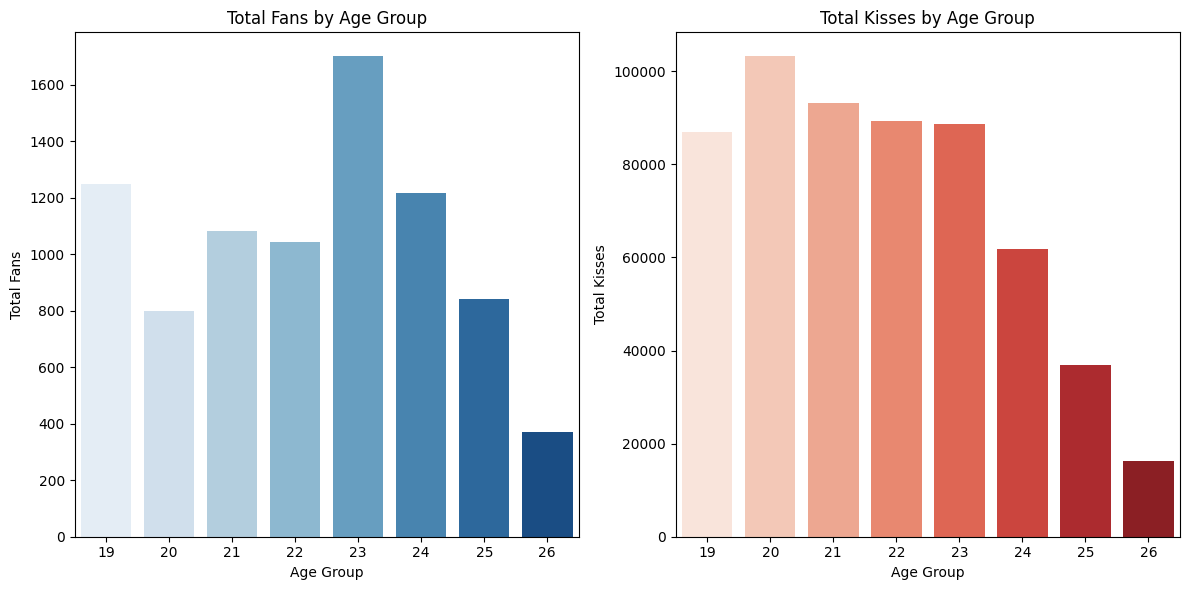

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='age', y='counts_fans', data=age_grouped, palette='Blues')
plt.title('Total Fans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Fans')

plt.subplot(1, 2, 2)
sns.barplot(x='age', y='counts_kisses', data=age_grouped, palette='Reds')
plt.title('Total Kisses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Kisses')

plt.tight_layout()
plt.show()


is charisma linked to being active at certain times of the day or week

In [ ]:
# Ensure 'lastOnlineDate' is in datetime format
charismatic_users['lastOnlineDate'] = pd.to_datetime(charismatic_users['lastOnlineDate'])

# Extract the hour of the day and the day of the week
charismatic_users['hour_of_day'] = charismatic_users['lastOnlineDate'].dt.hour
charismatic_users['day_of_week'] = charismatic_users['lastOnlineDate'].dt.day_name()  # e.g., 'Monday', 'Tuesday', etc.
charismatic_users

<ipython-input-29-442c1beb8e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charismatic_users['lastOnlineDate'] = pd.to_datetime(charismatic_users['lastOnlineDate'])
<ipython-input-29-442c1beb8e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charismatic_users['hour_of_day'] = charismatic_users['lastOnlineDate'].dt.hour
<ipython-input-29-442c1beb8e6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,whazzup,pictureId,userId,isSystemProfile,engagement_rate,picture_effectiveness,charisma_score,is_charismatic,hour_of_day,day_of_week
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN,0.03,59.75,11.96,True,20,Saturday
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN,0.06,22.00,4.42,True,14,Monday
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN,0.05,339.00,67.82,True,11,Tuesday
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN,0.04,118.50,23.71,True,14,Monday
6,F,none,24,Anna,0.65,13,18672,492,0,1,...,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,NaN,0.03,37.85,7.58,True,19,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,F,M,21,C*y,0.46,6,2405,109,0,0,...,NaN,CRYjVoExakQY+sSh1MtTX+7zd+wUrQQhscf19rfPA6FQ+6...,b4e5e6854867b90d7d9e0265eab01fc3,NaN,0.05,18.17,3.65,True,11,Sunday
3967,F,M,21,`Ca***.,0.08,5,6613,132,0,0,...,snap: misscassy001. ...,CRYrwoeAFyMXYTvu24f8xxnCZa0B8UkGdWJva08acmqHfD...,beb2d6f1aad73d898044ac378ca68e39,NaN,0.02,26.40,5.29,True,16,Sunday
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN,0.05,15.00,3.02,True,0,Tuesday
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN,0.02,17.75,3.56,True,15,Monday


In [ ]:
# Group by hour of the day and calculate mean charisma score
hourly_charisma = charismatic_users.groupby('hour_of_day').agg({
    'charisma_score': 'mean',
    'counts_fans': 'sum',
    'counts_kisses': 'sum'
}).reset_index()

# Check the hourly aggregation result
print(hourly_charisma)


    hour_of_day  charisma_score  counts_fans  counts_kisses
0             0       10.949444          121           3493
1             1       13.291429           98           2608
2             2       14.998889           38           4040
3             3       12.734000           31           1761
4             4       24.832727           15           4746
5             5       12.137308           32           6077
6             6       10.821600           26           9597
7             7        9.390857          327          14554
8             8       15.931373           44          14032
9             9       17.424444          136          20889
10           10       15.157419          502          45457
11           11       15.424876          567          73115
12           12       10.943556          479          28395
13           13       11.741194          371          21756
14           14       12.479552         1141         104788
15           15       11.348632         

In [ ]:
# Group by day of the week and calculate mean charisma score
weekly_charisma = charismatic_users.groupby('day_of_week').agg({
    'charisma_score': 'mean',
    'counts_fans': 'sum',
    'counts_kisses': 'sum'
}).reset_index()

# Ensure the days are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_charisma['day_of_week'] = pd.Categorical(weekly_charisma['day_of_week'], categories=days_order, ordered=True)

# Check the weekly aggregation result
print(weekly_charisma)


  day_of_week  charisma_score  counts_fans  counts_kisses
0      Friday       13.180952           62          17914
1      Monday       11.842102         3238         187547
2    Saturday       11.836867          777          47278
3      Sunday       15.744297         1625         185350
4    Thursday        9.838333          190           6926
5     Tuesday       12.695116          867          48060
6   Wednesday       13.118340         1544          83117


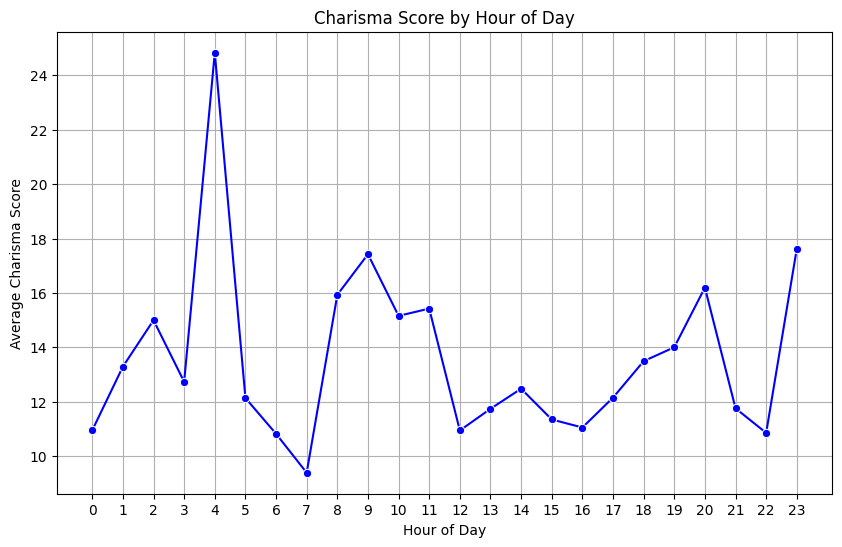

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot charisma score by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='charisma_score', data=hourly_charisma, marker='o', color='b')
plt.title('Charisma Score by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Charisma Score')
plt.grid(True)
plt.xticks(range(24))  # Show all hours of the day
plt.show()


<ipython-input-33-eed03449780b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='charisma_score', data=weekly_charisma, palette='viridis')


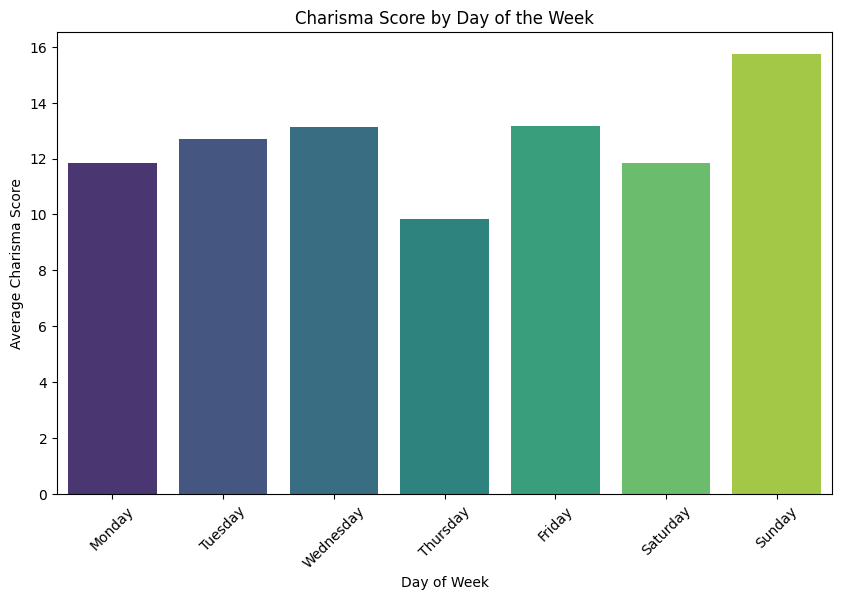

In [ ]:
# Plot charisma score by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='charisma_score', data=weekly_charisma, palette='viridis')
plt.title('Charisma Score by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Charisma Score')
plt.xticks(rotation=45)
plt.show()




1.   Average Engagement Rate is high in older age group of users
2.   Average Picture effectiveness is high in younger age group
3.   Charismatic Score is high in younger users
3.   The Distribution of age user is same for both type of user charismatic and non charismatic
4.   Number of Pictures is directly related to high charisma score
5.   Mid age group get more Fans
6.   Younger age users get more kisses which is connected to Avg PE in younger age users
7.  Mid night talks from (3am - 5am) is high for charismatic users
8.  Sunday is the day where charismatic user are more active



Based on the findings from this analysis, it's clear that several factors contribute to a higher charisma score, and these traits can be adopted by anyone. Here’s what you can do to boost your charisma and engagement:

- Be More Engaged: Older users have a higher engagement rate, so consistent interaction and active participation can help increase your charisma.

- Optimize Your Visual Content: Younger users excel at creating effective pictures, so focus on creating visually appealing, engaging content to attract more attention.

- Increase Your Activity: Charismatic users tend to be active late at night and on Sundays, so try engaging with your audience at these times to maximize visibility.

- Post More Pictures: If you want to increase your charisma score, consider sharing more pictures. The number of pictures posted correlates with a higher charisma score.

- Foster Emotional Connections: Young users tend to receive more kisses, which are often driven by emotional engagement. Use pictures to share personal, authentic moments to connect with others.

- Engage with Fans: Mid-age users receive more fans, possibly because their content resonates widely. Tailoring your content to appeal to a broad audience can help you build a loyal fan base.